In [64]:
from osgeo import gdal, ogr, osr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd

In [94]:
ds = gdal.Open("image_2002.tif")

In [95]:
def get_std(arr):
    return np.std(arr)

def get_correlation_coeff(a, b):
    cc = pearsonr(a, b)[0]
    return cc

In [96]:
std = {}
for band in range(ds.RasterCount):
    data_arr = ds.GetRasterBand(band + 1).ReadAsArray() * 2.75e-05 - 0.2
    data_arr = data_arr[~np.isnan(data_arr)]
    st = get_std(data_arr)
    std[str(band + 1)] = st
print(std)

{'1': 0.014382500074884855, '2': 0.019560512510663652, '3': 0.03400683019778441, '4': 0.047089583101759654, '5': 0.05978587379445455, '6': 0.046875841527301586}


In [97]:
corr = {}
for i in range(ds.RasterCount):
    for j in range(i, ds.RasterCount):
        if(i==j):
            continue
        a = ds.GetRasterBand(i + 1).ReadAsArray() * 2.75e-05 - 0.2
        b = ds.GetRasterBand(j + 1).ReadAsArray() * 2.75e-05 - 0.2
        a = a[~np.isnan(a)]
        b = b[~np.isnan(b)]
        cc = get_correlation_coeff(a.reshape(-1), b.reshape(-1))
        corr[str(i + 1) + "_" + str(j + 1)] = cc
print(corr)

{'1_2': 0.9547357472440923, '1_3': 0.9010073801061751, '1_4': 0.11347463268513075, '1_5': 0.6066244579237073, '1_6': 0.7535120083743619, '2_3': 0.9556791369557667, '2_4': 0.25849767626350406, '2_5': 0.7157307456934959, '2_6': 0.8231837009972307, '3_4': 0.2771854791210639, '3_5': 0.8080836105125562, '3_6': 0.9025661065277265, '4_5': 0.6420137183321746, '4_6': 0.43201688341721195, '5_6': 0.9398226479083233}


In [86]:
oif = []
for i in range(ds.RasterCount):
    for j in range(i, ds.RasterCount):
        for k in range(j, ds.RasterCount):
            if(i==j or i == k or j == k):
                continue
            sum_std = std[str(i + 1)] + std[str(j + 1)] + std[str(k + 1)]
            sum_cc = corr[str(i + 1) + "_" + str(j + 1)] + corr[str(i + 1) + "_" + str(k + 1)] + corr[str(j + 1) + "_" + str(k + 1)]
            _oif = sum_std / sum_cc
            band_com = str(i + 1) + str(j + 1) + str(k + 1)
            oif.append([band_com, sum_std, sum_cc, _oif])


In [68]:
oif_df = pd.DataFrame(oif, columns=['Band Combinatios', 'Sum Std.', 'Sum Corr', 'OIF'])
print(oif_df)

   Band Combinatios  Sum Std.  Sum Corr       OIF
0               123  0.053543  2.870344  0.018654
1               124  0.063543  1.080195  0.058825
2               125  0.073962  2.249787  0.032875
3               126  0.067563  2.589046  0.026096
4               134  0.070911  0.977272  0.072560
5               135  0.081330  2.355679  0.034525
6               136  0.074931  2.695090  0.027803
7               145  0.091330  0.977573  0.093425
8               146  0.084931  0.942668  0.090097
9               156  0.095350  2.503083  0.038093
10              234  0.073505  1.105656  0.066481
11              235  0.083924  2.249074  0.037315
12              236  0.077525  2.594256  0.029883
13              245  0.093924  1.000736  0.093855
14              246  0.087525  0.971600  0.090084
15              256  0.097945  2.297027  0.042640
16              345  0.101292  0.973611  0.104038
17              346  0.094893  0.944628  0.100456
18              356  0.105312  2.478869  0.042484


In [88]:
corr_mat = []
for i in range(ds.RasterCount):
    corr_mat_row = []
    for j in range(ds.RasterCount):
        a = ds.GetRasterBand(i + 1).ReadAsArray() * 2.75e-05 - 0.2
        b = ds.GetRasterBand(j + 1).ReadAsArray() * 2.75e-05 - 0.2
        a = a[~np.isnan(a)]
        b = b[~np.isnan(b)]
        cc = get_correlation_coeff(a.reshape(-1), b.reshape(-1))
        corr_mat_row.append(cc)
        print(i, j)
    corr_mat.append(corr_mat_row)
corr_mat = np.array(corr_mat)
print(corr_mat)

0 0
0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
2 2
2 3
2 4
2 5
3 0
3 1
3 2
3 3
3 4
3 5
4 0
4 1
4 2
4 3
4 4
4 5
5 0
5 1
5 2
5 3
5 4
5 5
[[1.         0.95989139 0.95258243 0.17998732 0.7302472  0.84754694]
 [0.95989139 1.         0.9594804  0.31733765 0.72700528 0.82182025]
 [0.95258243 0.9594804  1.         0.27051731 0.81257239 0.90840749]
 [0.17998732 0.31733765 0.27051731 1.         0.53084094 0.3578178 ]
 [0.7302472  0.72700528 0.81257239 0.53084094 1.         0.95709227]
 [0.84754694 0.82182025 0.90840749 0.3578178  0.95709227 1.        ]]


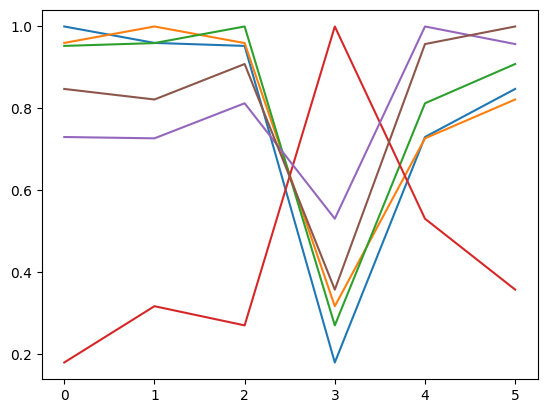

In [89]:
for r in corr_mat:
    plt.plot(r)
plt.show()

In [90]:
cor_mat_df = pd.DataFrame(corr_mat, columns=['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6'])

In [91]:
cor_mat_df

,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6
0,1.000000,0.959891,0.952582,0.179987,0.730247,0.847547
1,0.959891,1.000000,0.959480,0.317338,0.727005,0.821820
2,0.952582,0.959480,1.000000,0.270517,0.812572,0.908407
3,0.179987,0.317338,0.270517,1.000000,0.530841,0.357818
4,0.730247,0.727005,0.812572,0.530841,1.000000,0.957092
5,0.847547,0.821820,0.908407,0.357818,0.957092,1.000000


In [92]:
oif_df.to_csv("oif.csv")

In [93]:
cor_mat_df.to_csv("cor_mat.csv")